In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def order_book(month,day):
    data1 = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_0'+str(month)+'_'+str(day)+'_order_book_final.csv'
    data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
    data_book = data1[['0','1','2','3']]
    return data_book

In [3]:
data_book = order_book(1,28)

In [4]:
data_book_open = data_book[213*4-3:67229*4+1]
data_book_open = data_book_open.reset_index(drop = True)

In [5]:
def day_time(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.0'+str(month)+'.'+str(day)+'.csv'
    data = pd.read_csv(datapath)
    data_CNF14 = data[data.Series == 'CNF14']
    data = data_CNF14
    market_open_time = data[data['TimeStamp'].str.contains('2014-0'+str(month)+'-'+str(day)+'D09:00')].index.tolist()[0] 
    market_close_time = data[data['TimeStamp'].str.contains('2014-0'+str(month)+'-'+str(day)+'D16:00')].index.tolist()[0] 
    data_open = data[market_open_time:market_close_time+1]
    timestamp_ = data_open.TimeStamp.unique()
    return timestamp_

In [6]:
timestamp_time = day_time(1,28)

In [7]:
def time_transform(timestamp_time):
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600 \
                +float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60\
                +float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second.append(second - 32400.0)
    return  time_second

In [8]:
timestamp_time_second = time_transform(timestamp_time)

In [9]:
def bid123_ask123_Q(data_book_28_open):
    Bid1 = []
    Bid2 = []
    Bid3 = []
    Bid1_Quantity = []
    Bid2_Quantity = []
    Bid3_Quantity = []
    Ask1 = []
    Ask2 = []
    Ask3 = []
    Ask1_Quantity = []
    Ask2_Quantity = []
    Ask3_Quantity = []

    TimeStamp = []
    for i in range(1,len(data_book_28_open),4):
        #print data_book_28_open.iloc[i]['0']
        #print data_book_28_open.iloc[i]['2']
        Bid1.append(float(data_book_28_open.iloc[i]['0'])/100.0)
        Bid1_Quantity.append(float(data_book_28_open.iloc[i]['1']))

        Bid2.append(float(data_book_28_open.iloc[i + 1]['0'])/100.0)
        Bid2_Quantity.append(float(data_book_28_open.iloc[i + 1]['1']))  

        Bid3.append(float(data_book_28_open.iloc[i + 2]['0'])/100.0)
        Bid3_Quantity.append(float(data_book_28_open.iloc[i + 2]['1']))  

        Ask1.append(float(data_book_28_open.iloc[i]['2'])/100.0) 
        Ask1_Quantity.append(float(data_book_28_open.iloc[i]['3']))

        Ask2.append(float(data_book_28_open.iloc[i + 1]['2'])/100.0) 
        Ask2_Quantity.append(float(data_book_28_open.iloc[i + 1]['3']))    

        Ask3.append(float(data_book_28_open.iloc[i + 2]['2'])/100.0) 
        Ask3_Quantity.append(float(data_book_28_open.iloc[i + 2]['3']))    
        TimeStamp.append(data_book_28_open.iloc[i-1][1])
    return Bid1,Bid1_Quantity,Bid2,Bid2_Quantity,Bid3,Bid3_Quantity,Ask1,Ask1_Quantity,Ask2,Ask2_Quantity,Ask3,Ask3_Quantity,    

In [10]:
import time 
start = time.time()
Bid1,Bid1_Quantity,Bid2,Bid2_Quantity,Bid3,Bid3_Quantity,Ask1,Ask1_Quantity,Ask2,Ask2_Quantity,Ask3,Ask3_Quantity = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 160.163405


In [11]:
def rise_bid(Bid1,timestamp_time_second):
    rise_ratio = []
    for i in range(0,600):
        rise_ratio_ = round((Bid1[i] - Bid1[0])*(1.0)/Bid1[0]*100,5)
        rise_ratio.append(rise_ratio_)
    for i in range(600,len(Bid1),1):
        index_start = np.where(np.array(timestamp_time_second[:i]) >= timestamp_time_second[i] - 600)[0][0]
        rise_ratio_ = round((Bid1[i] - Bid1[index_start])*(1.0)/Bid1[index_start]*100,5)
        rise_ratio.append(rise_ratio_)
    return rise_ratio

In [12]:
import time 
start = time.time()
rise_ratio_bid = rise_bid(Bid1,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 78.568311


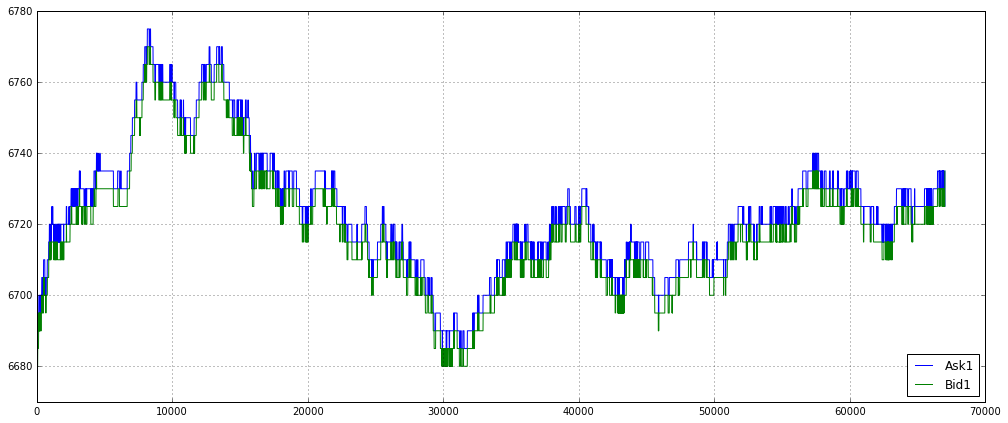

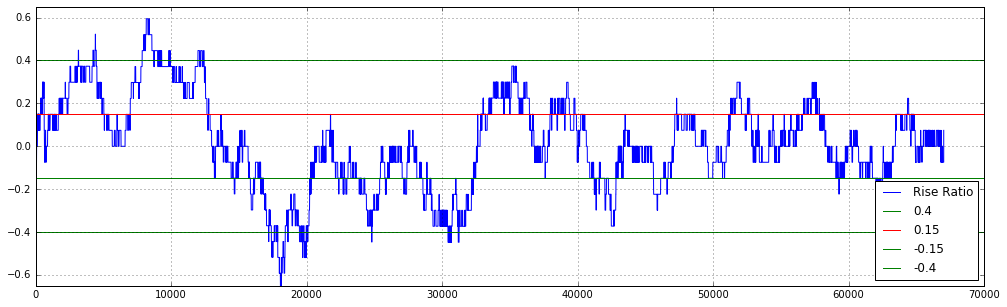

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,7))
plt.grid()
plot(Ask1[0:len(Ask1)],label = 'Ask1')
#plot(Ask2[0:len(Ask1)],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_1530_1600],label = 'Ask3')
#plot(min_Ask1_time_series[0:len(Ask1)],label = 'min Ask1')
#plot(max_Bid1_time_series[0:len(Ask1)],label = 'max Bid1')

plot(Bid1[0:len(Ask1)],label = 'Bid1')
#plot(Bid2[0:len(Ask1)],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_1530_1600],label = 'Bid3')
plt.ylim(6670,6780)
plt.legend(loc = 4)
plt.figure(figsize = (17,5))
plt.grid()
plot(rise_ratio_bid,label = 'Rise Ratio')

plt.axhline(0.4,color = 'g',linestyle = '-',label = 0.4)
plt.axhline(0.15,color = 'r',linestyle = '-',label = 0.15)
plt.axhline(-0.15,color = 'g',linestyle = '-',label = -0.15)
plt.axhline(-0.4,color = 'g',linestyle = '-',label = -0.4)
plt.ylim(-0.65,0.65)
plt.legend(loc = 4)

In [161]:
def rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,close_price,\
             N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,\
             N_1_E,N_2_E,N_3_E,N_4_E,N_5_E,N_1_M,N_2_M,N_3_M,N_4_M,N_5_M,\
             N_1_TI,N_2_TI,N_3_TI,N_4_TI,N_5_TI):
    
    if rise_ratio_bid[index] <= -0.4:
        N_1 = N_1 + 1
        #print rise_ratio_ask[index]
        #Ask1[i] < max_Bid1_time_series[i+1]
        if Ask1[index] < max(Bid1[(index+1):index + index_15_min + 1]):
            N_1_T = N_1_T + 1
            N_1_E = N_1_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_1_E
            first_max_index = np.where(np.array(Bid1[(index + 1):index + 1 + index_15_min + 1 ]) > Ask1[index])[0][0]
            N_1_M = N_1_M + (Ask1[index] - min(Bid1[(index + 1):(index + 1 + first_max_index + 1)]))*(1.0)/(5.0) 
            
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_max_index + 1]
            N_1_TI = N_1_TI + (time_traded - time_start)
            #print N_1_TI
            pass
        else:
            if i < 25200 - 900:
                N_1_E = N_1_E + (Bid1[index + index_15_min] - Bid1[index])*(1.0)/(5.0)
                N_1_M = N_1_M + (Ask1[index] - min(Bid1[(index+1):(index + 1 + index_15_min + 1 )]))*(1.0)/(5.0) 
                #print N_1_M
                N_1_TI = N_1_TI + (900.0)
                #print N_1_TI
            else:
                N_1_E = N_1_E + (close_price - Bid1[index])*(1.0)/(5.0)
                N_1_M = N_1_M + (Ask1[index] - min(Bid1[(index+1):]))*(1.0)/(5.0) 
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_1_TI = N_1_TI + (time_traded - time_start)
                #print N_1_TI
            pass

    elif -0.4 < rise_ratio_bid[index] <= -0.15:
        N_2 = N_2 + 1
        #print rise_ratio_ask[index]
        if Ask1[index] < max(Bid1[(index+1):index + index_15_min + 1]):
            #print 3
            N_2_T = N_2_T + 1
            N_2_E = N_2_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_2_E
            first_max_index = np.where(np.array(Bid1[(index+1):index + 1 + index_15_min + 1 ]) > Ask1[index])[0][0]
            N_2_M = N_2_M + (Ask1[index] - min(Bid1[(index + 1):(index + 1 + first_max_index + 1)]))*(1.0)/(5.0) 
            
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_max_index + 1]
            N_2_TI = N_2_TI + (time_traded - time_start)
            #print N_2_TI
            pass
        else:
            if i < 25200 - 900:
                N_2_E = N_2_E + (Bid1[index + index_15_min] - Bid1[index])*(1.0)/(5.0)
                N_2_M = N_2_M + (Ask1[index] - min(Bid1[(index+1):(index + 1 + index_15_min + 1 )]))*(1.0)/(5.0) 
                N_2_TI = N_2_TI + (900.0)
                #print N_2_TI
            else:
                N_2_E = N_2_E + (close_price - Bid1[index])*(1.0)/(5.0)
                N_2_M = N_2_M + (Ask1[index] - min(Bid1[(index+1):]))*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_2_TI = N_2_TI + (time_traded - time_start)
                #print N_2_TI
            pass

    elif -0.15 < rise_ratio_bid[index] <= 0.15:
        N_3 = N_3 + 1
        #print rise_ratio_ask[index]
        if Ask1[index] < max(Bid1[(index+1):index + index_15_min + 1]):
            #print 5
            N_3_T = N_3_T + 1
            N_3_E = N_3_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_3_E
            first_max_index = np.where(np.array(Bid1[(index + 1):index + 1 + index_15_min + 1]) > Ask1[index])[0][0]
            N_3_M = N_3_M + (Ask1[index] - min(Bid1[(index + 1):(index + 1 + first_max_index + 1)]))*(1.0)/(5.0) 
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_max_index + 1]
            N_3_TI = N_3_TI + (time_traded - time_start)
            #print N_3_TI
            pass
        else:
            if i < 25200 - 900:
                N_3_E = N_3_E + (Bid1[index + index_15_min] - Bid1[index])*(1.0)/(5.0)
                N_3_M = N_3_M + (Ask1[index] - min(Bid1[(index+1):(index + 1 + index_15_min + 1 )]))*(1.0)/(5.0) 
                N_3_TI = N_3_TI + (900.0)
                #print N_3_TI
            else:
                N_3_E = N_3_E + (close_price - Bid1[index])*(1.0)/(5.0)
                N_3_M = N_3_M + (Ask1[index] - min(Bid1[(index+1):]))*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_3_TI = N_3_TI + (time_traded - time_start)
                #print N_3_TI
            pass

    elif 0.15 < rise_ratio_bid[index] < 0.4:
        N_4 = N_4 + 1
        #print rise_ratio_ask[index]
        if Ask1[index] < max(Bid1[(index+1):index + index_15_min + 1]):
            #print 7
            N_4_T = N_4_T + 1
            N_4_E = N_4_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_4_E
            first_max_index = np.where(np.array(Bid1[(index+1):index + 1 + index_15_min + 1 ]) > Ask1[index])[0][0]
            N_4_M = N_4_M + (Ask1[index] - min(Bid1[(index + 1):(index + 1 + first_max_index + 1)]))*(1.0)/(5.0) 
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_max_index + 1]
            N_4_TI = N_4_TI + (time_traded - time_start)
            #print N_4_TI
            pass
        else:
            if i < 25200 - 900:
                N_4_E = N_4_E + (Bid1[index + index_15_min] - Bid1[index])*(1.0)/(5.0)
                N_4_M = N_4_M + (Ask1[index] - min(Bid1[(index+1):(index + 1 + index_15_min + 1 )]))*(1.0)/(5.0) 
                N_4_TI = N_4_TI + (900.0)
                #print N_4_TI
            else:
                N_4_E = N_4_E + (close_price - Bid1[index])*(1.0)/(5.0)
                N_4_M = N_4_M + (Ask1[index] - min(Bid1[(index+1):]))*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_4_TI = N_4_TI + (time_traded - time_start)
                #print N_4_TI
            pass

    elif 0.4 <= rise_ratio_bid[index]:
        N_5 = N_5 + 1
        #print rise_ratio_ask[index]
        if Ask1[index] < max(Bid1[(index+1):index + index_15_min + 1]):
            N_5_T = N_5_T + 1
            N_5_E = N_5_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_5_E      
            first_max_index = np.where(np.array(Bid1[(index+1):index + 1 + index_15_min + 1 ]) > Ask1[index])[0][0]
            N_5_M = N_5_M + (Ask1[index] - min(Bid1[(index + 1):(index + 1 + first_max_index + 1)]))*(1.0)/(5.0) 
            
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_max_index + 1]
            N_5_TI = N_5_TI + (time_traded - time_start)
            #print N_5_TI
            pass
        else:
            if i < 25200 - 900:
                N_5_E = N_5_E + (Bid1[index + index_15_min] - Bid1[index])*(1.0)/(5.0)
                N_5_M = N_5_M + (Ask1[index] - min(Bid1[(index+1):(index + 1 + index_15_min + 1)]))*(1.0)/(5.0) 
                N_1_TI = N_1_TI + (900.0)
                #print N_5_TI
            else:
                N_5_E = N_5_E + (close_price - Bid1[index])*(1.0)/(5.0)
                N_5_M = N_5_M + (Ask1[index] - min(Bid1[(index+1):]))*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_5_TI = N_5_TI + (time_traded - time_start)
                #print N_5_TI 
            pass
        
    return N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,N_1_E,N_2_E,N_3_E,N_4_E,N_5_E,N_1_M,N_2_M,N_3_M,N_4_M,N_5_M,\
           N_1_TI,N_2_TI,N_3_TI,N_4_TI,N_5_TI

In [102]:
Bid = Bid1
Ask = Ask1
close_price = 6750
[N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
 N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI] = [0 for i in  range(0,25,1)]
[N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
 N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI] = [0 for i in  range(0,25,1)]
[N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
 N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI] = [0 for i in  range(0,25,1)]
[N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
 N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI] = [0 for i in  range(0,25,1)]
[N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
 N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI] = [0 for i in  range(0,25,1)]

for i in range(0,25200,1):
    #print i
    #print np.where(array(timestamp_time_second) <= i)[0]
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    #print i
    #print index
    #print timestamp_time_second[index]
    if i < 25200 - 900:
        index_15_min = np.where(np.array(timestamp_time_second[index:]) >= i + 900)[0][0]
        #print index_15_min
        #print timestamp_time_second[index+index_15_min]
    #print 'time stamp = %d'%(timestamp_time_second[index])
    #print index
    #print index + index_15_min 
    #rint Bid1[index]
    #print Ask1[index]
    #print len(Ask1[(index+1):index + index_15_min])
    
    #if Bid1[index] > min(Ask1[(index+1):index + index_15_min]):
    #    first_min_index = np.where(np.array(Ask1[(index+1):index + index_15_min]) < Bid1[index])[0][0]
    #    print 'mdd = %d'%((max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0))
    #print min_Ask1_time_series[index + 1]
    weighted_Bid = Bid1_Quantity[index] * weight1 + Bid2_Quantity[index] * weight2 + Bid3_Quantity[index] * weight3
    weighted_Ask = Ask1_Quantity[index] * weight1 + Ask2_Quantity[index] * weight2 + Ask3_Quantity[index] * weight3  
    #print weighted_Bid 
    #print weighted_Ask
    #print (weighted_Bid*(1.0) / weighted_Ask)
    
    if (weighted_Bid*(1.0) / weighted_Ask) <= 0.7:
        N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
        N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,\
                                                      N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,\
                                                      N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI)                                               

    elif 0.7 < (weighted_Bid*(1.0) / weighted_Ask) <= 0.9:
        N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
        N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,\
                                                      N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,\
                                                      N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI)                                                

    elif 0.9 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.1:
        N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
        N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,\
                                                      N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,\
                                                      N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI)                                    
 
    elif 1.1 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.3:
        N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
        N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,\
                                                      N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,\
                                                      N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI)                              

    elif 1.30 < (weighted_Bid*(1.0) / weighted_Ask):
        N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
        N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,\
                                                      N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,\
                                                      N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI)                 
        
        

KeyboardInterrupt: 

In [165]:
def ask(time,Bid,Ask,close_price,timestamp_time_second,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,\
        Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weigth1,weigth2,weigth3):
    [N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
     N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI] = [0 for i in  range(0,25,1)]
    [N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
     N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI] = [0 for i in  range(0,25,1)]
    [N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
     N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI] = [0 for i in  range(0,25,1)]
    [N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
     N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI] = [0 for i in  range(0,25,1)]
    [N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
     N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI] = [0 for i in  range(0,25,1)]

    for i in range(0,time,1):
        index = np.where(array(timestamp_time_second) <= i)[0][-1]
        if i < 25200 - 900:
            index_15_min = np.where(np.array(timestamp_time_second[index:]) >= i + 900)[0][0]

        weighted_Bid = Bid1_Quantity[index] * weight1 + Bid2_Quantity[index] * weight2 + Bid3_Quantity[index] * weight3
        weighted_Ask = Ask1_Quantity[index] * weight1 + Ask2_Quantity[index] * weight2 + Ask3_Quantity[index] * weight3  
        if (weighted_Bid*(1.0) / weighted_Ask) <= 0.7:
            N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
            N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,\
                                                          N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,\
                                                          N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI)                                               
        elif 0.7 < (weighted_Bid*(1.0) / weighted_Ask) <= 0.9:
            N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
            N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,\
                                                          N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,\
                                                          N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI)                                                
        elif 0.9 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.1:
            N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
            N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,\
                                                          N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,\
                                                          N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI)                                    
        elif 1.1 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.3:
            N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
            N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,\
                                                          N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,\
                                                          N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI)                              
        elif 1.30 < (weighted_Bid*(1.0) / weighted_Ask):
            N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
            N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI = rise_cal(i,rise_ratio_bid,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,\
                                                          N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,\
                                                          N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI)                 
    return [[N_11,N_12,N_13,N_14,N_15],[N_11_T,N_12_T,N_13_T,N_14_T,N_15_T],[N_11_E,N_12_E,N_13_E,N_14_E,N_15_E],\
             [N_11_M,N_12_M,N_13_M,N_14_M,N_15_M],[N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI],\
            [N_21,N_22,N_23,N_24,N_25],[N_21_T,N_22_T,N_23_T,N_24_T,N_25_T],[N_21_E,N_22_E,N_23_E,N_24_E,N_25_E],\
             [N_21_M,N_22_M,N_23_M,N_24_M,N_25_M],[N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI],\
            [N_31,N_32,N_33,N_34,N_35],[N_31_T,N_32_T,N_33_T,N_34_T,N_35_T],[N_31_E,N_32_E,N_33_E,N_34_E,N_35_E],\
             [N_31_M,N_32_M,N_33_M,N_34_M,N_35_M],[N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI],\
            [N_41,N_42,N_43,N_44,N_45],[N_41_T,N_42_T,N_43_T,N_44_T,N_45_T],[N_41_E,N_42_E,N_43_E,N_44_E,N_45_E],\
             [N_41_M,N_42_M,N_43_M,N_44_M,N_45_M],[N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI],\
            [N_51,N_52,N_53,N_54,N_55],[N_51_T,N_52_T,N_53_T,N_54_T,N_55_T],[N_51_E,N_52_E,N_53_E,N_54_E,N_55_E],\
             [N_51_M,N_52_M,N_53_M,N_54_M,N_55_M],[N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI]] 




In [166]:
Bid = Bid1
Ask = Ask1
close_price = 6750
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20
time = 25200

In [167]:
import time 
start = time.time()
mat = ask(time,Bid,Ask,close_price,timestamp_time_second,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,\
          Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weight1,weight2,weight3)
end = time.time()  
print "Total time = %f"%(end - start) 

TypeError: range() integer end argument expected, got module.

In [144]:
a = 0
array(mat[a+1])*1.0/array(mat[a]),array(mat[a+2])/array(mat[a]),array(mat[a+3])/array(mat[a]),array(mat[a+4])/array(mat[a])

(array([ nan,  nan,   1.,  nan,  nan]),
 array([ nan,  nan,   1.,  nan,  nan]),
 array([ nan,  nan,   2.,  nan,  nan]),
 array([   nan,    nan,  193.5,    nan,    nan]))

In [145]:
a = a + 5
array(mat[a+1])*1.0/array(mat[a]),array(mat[a+2])/array(mat[a]),array(mat[a+3])/array(mat[a]),array(mat[a+4])/array(mat[a])

(array([ nan,  nan,   1.,  nan,  nan]),
 array([ nan,  nan,   1.,  nan,  nan]),
 array([ nan,  nan,   1.,  nan,  nan]),
 array([          nan,           nan,  121.33333333,           nan,
                  nan]))

In [146]:
a = a + 5
array(mat[a+1])*1.0/array(mat[a]),array(mat[a+2])/array(mat[a]),array(mat[a+3])/array(mat[a]),array(mat[a+4])/array(mat[a])

(array([ nan,  nan,  nan,  nan,  nan]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))

In [128]:
a = a + 5
array(mat[a+1])*1.0/array(mat[a]),array(mat[a+2])/array(mat[a]),array(mat[a+3])/array(mat[a]),array(mat[a+4])/array(mat[a])

(array([ nan,  nan,  nan,  nan,  nan]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))

In [147]:
a = a + 5
array(mat[a+1])*1.0/array(mat[a]),array(mat[a+2])/array(mat[a]),array(mat[a+3])/array(mat[a]),array(mat[a+4])/array(mat[a])

(array([ nan,  nan,  nan,  nan,  nan]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))